### Import de bibliotecas

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as streamlit

### Tradução de headers e leitura de CSV

In [204]:
#Novos nomes das colunas
headers = ["ID", "filial", "cidade", "tipo_cliente", "genero", "linha_de_produto", "preco_unitario", "quantidade", "taxa_5%", "total", "data", "hora", "forma_pagamento", "custo_produtos", "porcentagem_margem_bruta", "renda_bruta", "avaliacao"]

#Importar CSV
df = pd.read_csv("supermarket_sales.csv", names = headers, header = 0)
df['data'] = df['data'].astype('datetime64[ns]')
df['mes'] = pd.DatetimeIndex(df['data']).month
df['semana'] = pd.DatetimeIndex(df['data']).week
df['dia'] = pd.DatetimeIndex(df['data']).day
df['apenas_horas'] = df['hora'].str[:2]

/tmp/ipykernel_27927/3905113780.py:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['semana'] = pd.DatetimeIndex(df['data']).week


In [205]:
df['apenas_horas'].value_counts().sort_index().index

Index(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'], dtype='object')

### Análise inicial do dataset

In [206]:
#Primeiras linhas do CSV
df.head()

,ID,filial,cidade,tipo_cliente,genero,linha_de_produto,preco_unitario,quantidade,taxa_5%,total,...,hora,forma_pagamento,custo_produtos,porcentagem_margem_bruta,renda_bruta,avaliacao,mes,semana,dia,apenas_horas
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,1,5,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,3,10,8,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,9,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,4,27,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,6,8,10


In [207]:
#Informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        1000 non-null   object        
 1   filial                    1000 non-null   object        
 2   cidade                    1000 non-null   object        
 3   tipo_cliente              1000 non-null   object        
 4   genero                    1000 non-null   object        
 5   linha_de_produto          1000 non-null   object        
 6   preco_unitario            1000 non-null   float64       
 7   quantidade                1000 non-null   int64         
 8   taxa_5%                   1000 non-null   float64       
 9   total                     1000 non-null   float64       
 10  data                      1000 non-null   datetime64[ns]
 11  hora                      1000 non-null   object        
 12  forma_pagamento      

In [208]:
#Quantidade de linhas e colunas
df.shape

(1000, 21)

In [209]:
#Verificar se há NA
df.isna().sum()

ID                          0
filial                      0
cidade                      0
tipo_cliente                0
genero                      0
linha_de_produto            0
preco_unitario              0
quantidade                  0
taxa_5%                     0
total                       0
data                        0
hora                        0
forma_pagamento             0
custo_produtos              0
porcentagem_margem_bruta    0
renda_bruta                 0
avaliacao                   0
mes                         0
semana                      0
dia                         0
apenas_horas                0
dtype: int64

### Indicadores

In [210]:
#Venda por cidade
df.groupby("cidade")["total"].sum()

cidade
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: total, dtype: float64

In [211]:
#Média por cidade
df.groupby("cidade")["avaliacao"].mean()

cidade
Mandalay     6.818072
Naypyitaw    7.072866
Yangon       7.027059
Name: avaliacao, dtype: float64

In [212]:
#Contagem dos tipos de compradores ('Customer type')
tipos_consumidores = df["tipo_cliente"].value_counts()
tipos_consumidores

Member    501
Normal    499
Name: tipo_cliente, dtype: int64

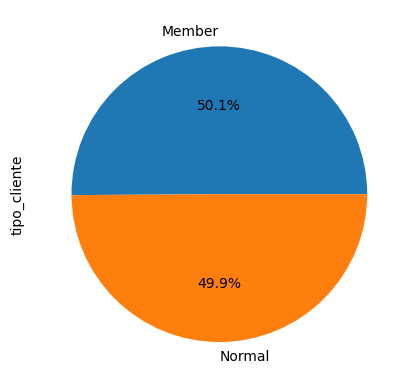

In [213]:
tipos_consumidores.plot(kind="pie", autopct='%.1f%%');

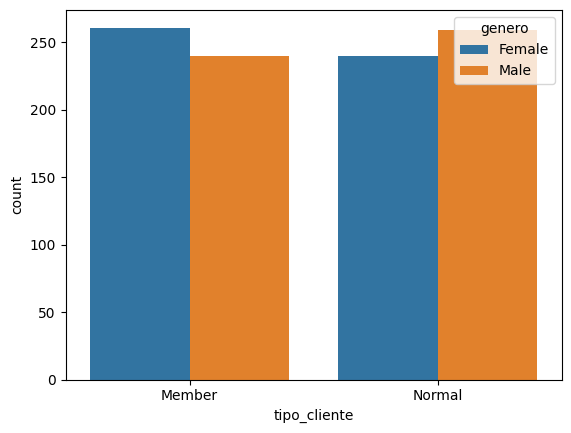

In [214]:
fig = sns.countplot(data=df, x='tipo_cliente', hue='genero')

In [215]:
#Quantidade de produtos vendidos por departamento ('Product line')
df.groupby("linha_de_produto")["quantidade"].sum()

linha_de_produto
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: quantidade, dtype: int64

<AxesSubplot: xlabel='linha_de_produto', ylabel='quantidade'>

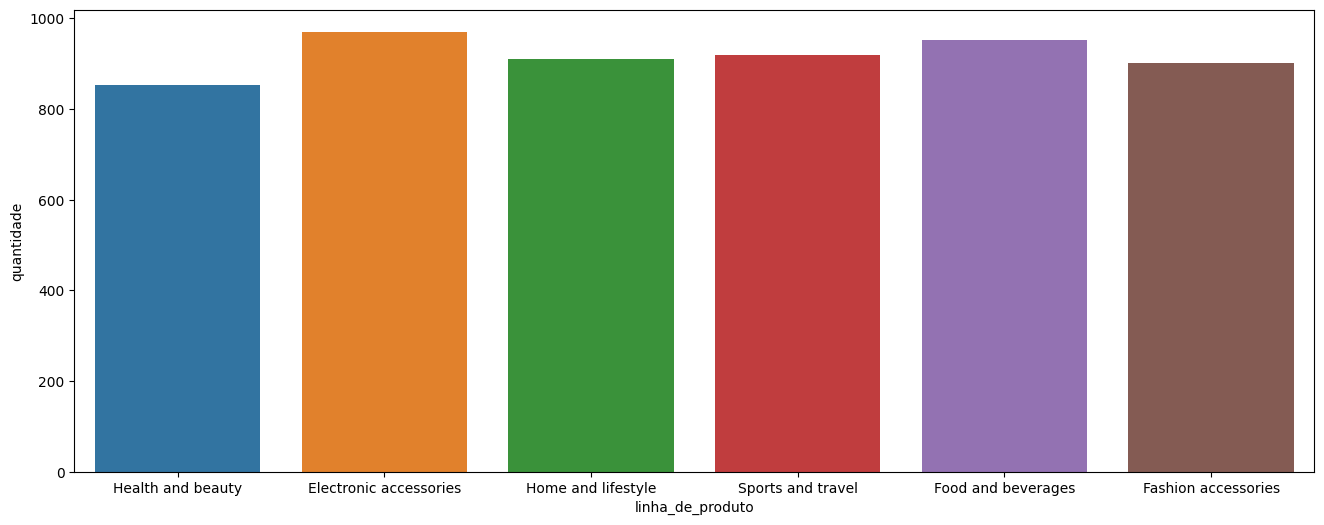

In [216]:
# Quantidade de itens vendidos por linha de produto
plt.subplots(figsize=(16,6))
sns.barplot(data=df, 
            x="linha_de_produto", 
            y="quantidade", 
            estimator="sum", 
            errorbar=None)    

<AxesSubplot: xlabel='filial', ylabel='total'>

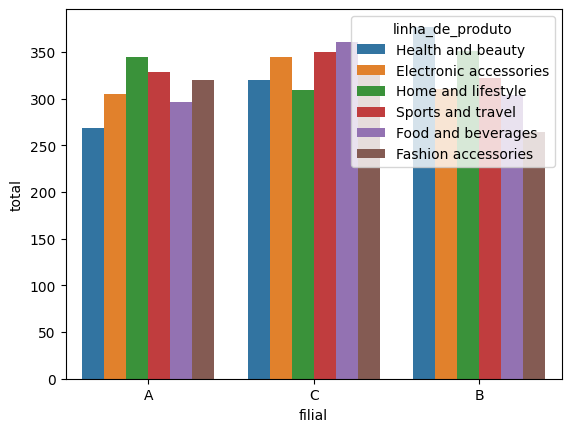

In [217]:
# Total de vendas por linha de produto por filial
sns.barplot(data=df,
            y='total',
            x='filial',
            hue="linha_de_produto", 
            errorbar=None)

In [218]:
#Ticket médio por linha de produto e cidade
ticket_medio = df.groupby('linha_de_produto')['total'].mean()
ticket_medio

linha_de_produto
Electronic accessories    319.632538
Fashion accessories       305.089298
Food and beverages        322.671517
Health and beauty         323.643020
Home and lifestyle        336.636956
Sports and travel         332.065220
Name: total, dtype: float64

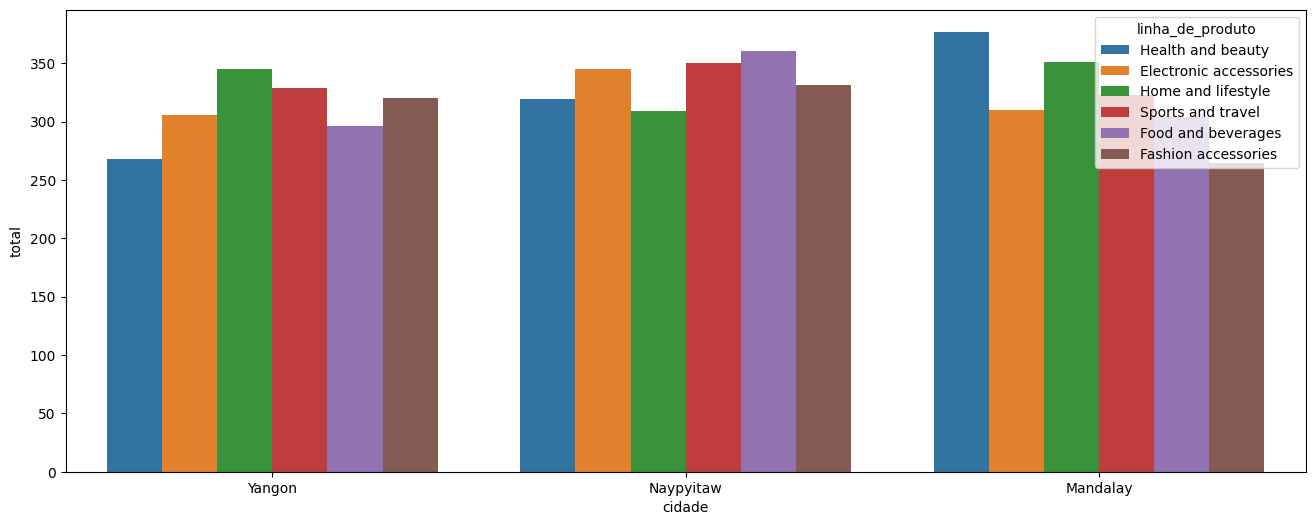

In [219]:
plt.subplots(figsize=(16,6))
sns.barplot(data=df, 
            x= "cidade", 
            y= "total", 
            estimator= "mean",
            hue= "linha_de_produto",
            errorbar=None);

<AxesSubplot: xlabel='linha_de_produto'>

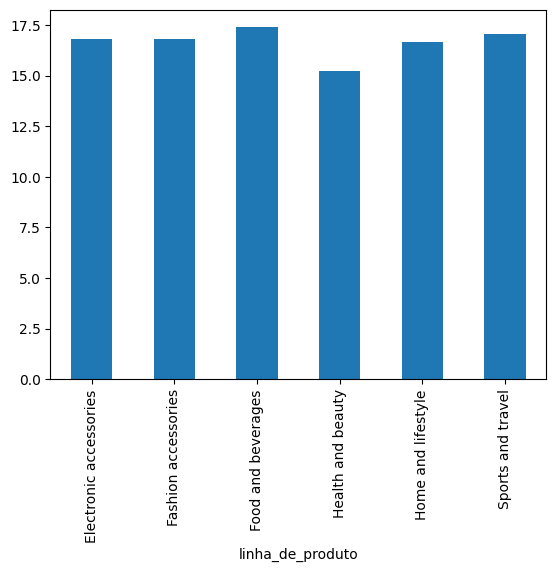

In [220]:
#Representativide de vendas por cidade e linha de produto
represente = df.groupby("linha_de_produto")["total"].sum() / df.groupby("linha_de_produto")["total"].sum().sum() * 100
represente.plot.bar()

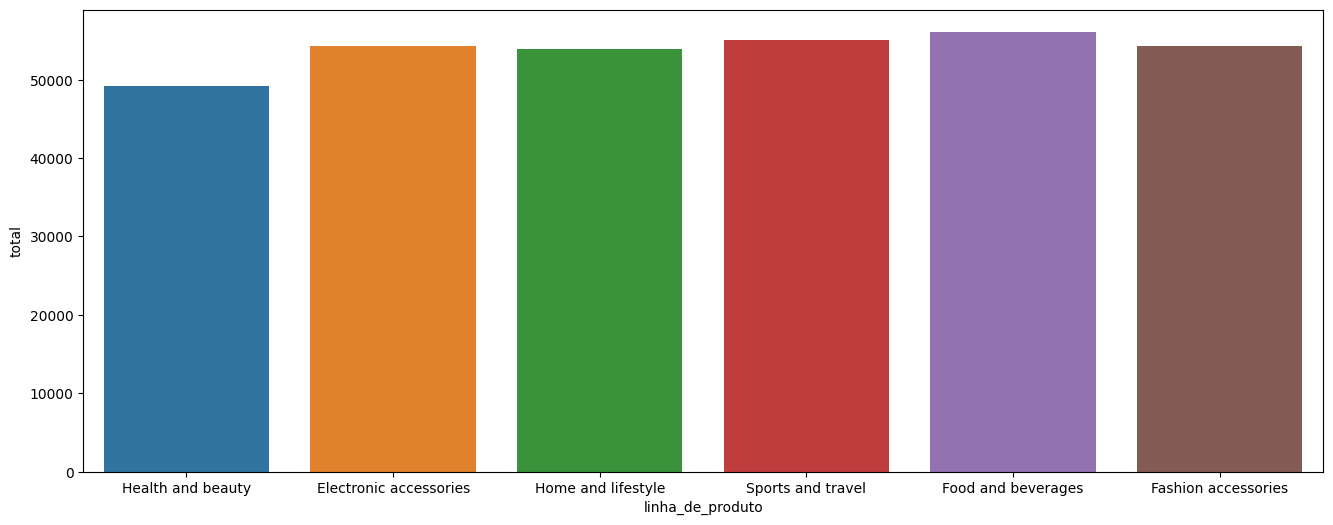

In [221]:
# Total de vendas por linha de produto
plt.subplots(figsize=(16,6))
sns.barplot(data = df, x = "linha_de_produto", y = "total", estimator= "sum", errorbar=None);


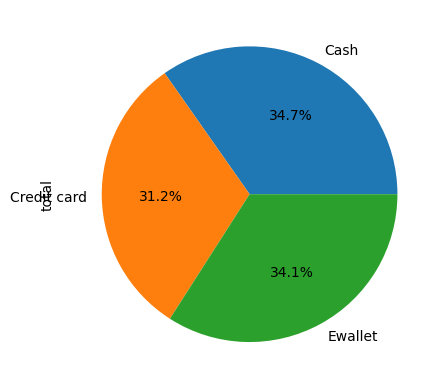

In [222]:
# •	Gráfico mostrando o total de vendas em cada forma de pagamento
forma_pagamento_total = df.groupby('forma_pagamento')['total'].sum()
forma_pagamento_total
forma_pagamento_total.plot(kind="pie", autopct='%.1f%%');

In [223]:
# •	gráfico mostrando a média de avaliação em cada loja
loja_avalicao = df.groupby('cidade')['avaliacao'].mean()

In [224]:
df['linha_de_produto'].value_counts().head(3)

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Name: linha_de_produto, dtype: int64

<AxesSubplot: xlabel='linha_de_produto', ylabel='count'>

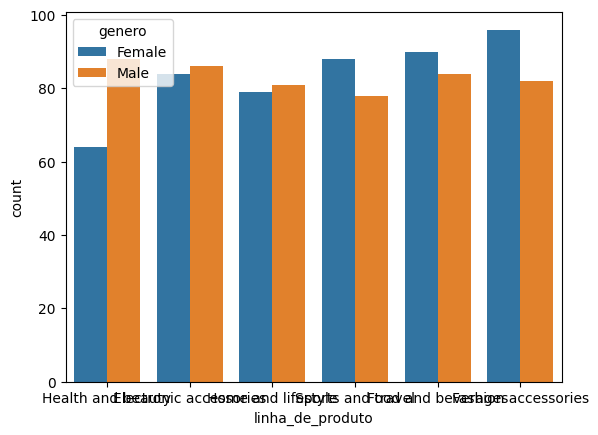

In [225]:
sns.countplot(data = df, x = 'linha_de_produto', hue = 'genero')

<AxesSubplot: xlabel='semana', ylabel='total'>

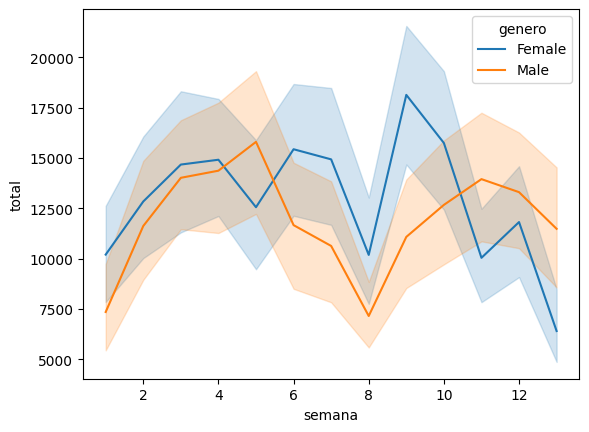

In [226]:
sns.lineplot(data=df, x='semana', y='total', hue = 'genero', estimator='sum')
# df['semana'].value_counts().sort_index()

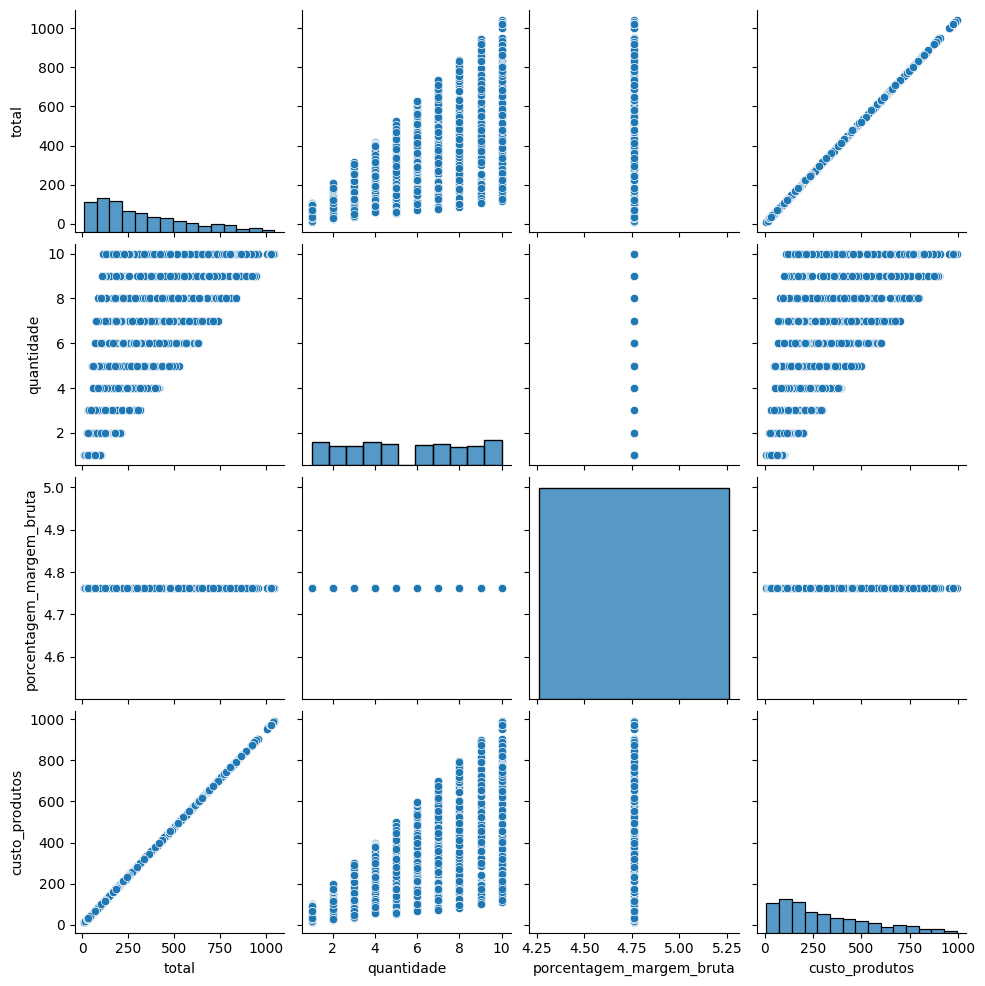

In [227]:
sns.pairplot(data = df[['total', 'quantidade', 'porcentagem_margem_bruta', 'custo_produtos']])

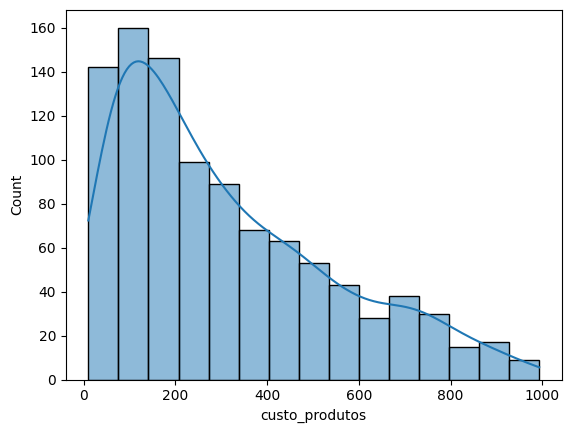

In [228]:
sns.histplot(data=df, x='custo_produtos', kde=True);

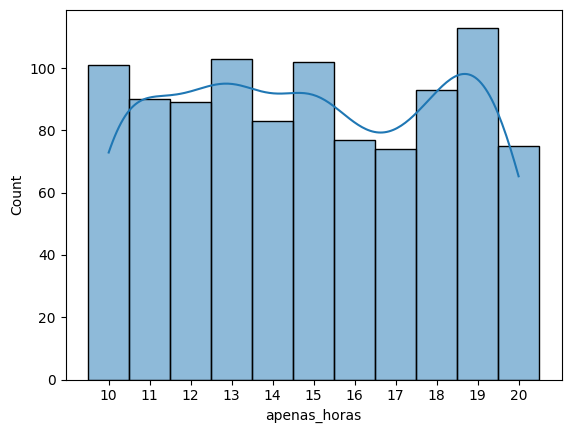

In [229]:
df_sorted = df.sort_values(by= 'apenas_horas')
sns.histplot(data = df_sorted, x = 'apenas_horas', kde = True);